In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

# Trip activity - Analysis


##### VEMO

#### Iber Ismael Piovani

#### Cargamos los datos de los viajes en un dataframe

In [189]:
df_trips = pd.read_csv('data/trips_activity.csv')

#### Analisis previo de los datos para empezar a interpretar la conformacion de los mismos buscando nulos y valores atipicos. 

#### Pre analysis of the data to start interpreting the conformation of the same looking for nulls and atypical values.

In [190]:
# Dataset composition

df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21486 entries, 0 to 21485
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21486 non-null  int64  
 1   id_week             21486 non-null  int64  
 2   id_driver           21486 non-null  int64  
 3   id_unit             21486 non-null  int64  
 4   trip_status         21486 non-null  object 
 5   trip_rev            18889 non-null  float64
 6   trip_distance       21486 non-null  float64
 7   time_on_trip        18283 non-null  float64
 8   mean_speed          18259 non-null  float64
 9   id_shift            18259 non-null  float64
 10  request_datetime    21486 non-null  object 
 11  drop_datetime       21486 non-null  object 
 12  trips_per_hour      16712 non-null  float64
 13  shift_time          19173 non-null  object 
 14  rest_days           19173 non-null  object 
 15  shift_str_datetime  21486 non-null  object 
dtypes: f

In [191]:
df_trips.describe()

,Unnamed: 0,id_week,id_driver,id_unit,trip_rev,trip_distance,time_on_trip,mean_speed,id_shift,trips_per_hour
count,21486.000000,21486.0,21486.000000,21486.000000,18889.000000,21486.000000,18283.000000,18259.000000,18259.000000,16712.000000
mean,10742.500000,49.0,656.833845,106.434609,98.562022,10.832123,39.091735,19.981026,28106.821567,1.864612
std,6202.618278,0.0,252.931233,58.763279,63.986745,9.881230,20.839683,9.192492,8576.652177,1.176876
min,0.000000,49.0,6.000000,1.000000,-78.740000,0.000000,1.366667,0.000000,456.000000,0.171780
25%,5371.250000,49.0,506.000000,57.000000,52.590000,3.350000,24.008333,13.224229,25070.000000,1.094225
50%,10742.500000,49.0,720.000000,109.000000,85.390000,8.510000,35.100000,18.564461,31699.000000,1.582418
75%,16113.750000,49.0,862.000000,155.000000,128.480000,15.960000,49.233333,25.449924,34218.000000,2.310655
max,21485.000000,49.0,980.000000,211.000000,1626.290000,80.380000,207.483333,144.734695,35389.000000,43.902439


In [192]:
df_trips.shape

(21486, 16)

In [193]:
# Primero 5 filas que nos da un pantallazo muy general de los datos. 
# First 5 rows that gives us a general overview of the data.

df_trips.head()

,Unnamed: 0,id_week,id_driver,id_unit,trip_status,trip_rev,trip_distance,time_on_trip,mean_speed,id_shift,request_datetime,drop_datetime,trips_per_hour,shift_time,rest_days,shift_str_datetime
0,0,49,6,53,completed,70.35,9.36,43.116667,16.873310,457.0,2022-08-25 14:19,2022-08-25 15:02,1.802704,De 09:00 a 18:30,Lu - Ma,2022-08-25 9:00
1,1,49,6,19,completed,80.97,4.88,18.950000,18.205181,459.0,2022-08-27 16:09,2022-08-27 16:28,3.464870,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
2,2,49,6,53,rider_cancelled,38.11,0.00,NaN,NaN,NaN,2022-08-25 13:08,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
3,3,49,6,19,completed,99.43,10.14,40.550000,16.216793,459.0,2022-08-27 10:27,2022-08-27 11:08,1.599289,De 09:00 a 18:30,Lu - Ma,2022-08-27 9:00
4,4,49,6,19,completed,640.89,27.97,111.433333,15.060125,456.0,2022-08-24 9:50,2022-08-24 11:42,0.314465,De 09:00 a 18:30,Lu - Ma,2022-08-24 9:00


In [194]:
# analizamos la existencia de valores nulos
# we analyze the existence of null values

df_trips.isnull().sum()

Unnamed: 0               0
id_week                  0
id_driver                0
id_unit                  0
trip_status              0
trip_rev              2597
trip_distance            0
time_on_trip          3203
mean_speed            3227
id_shift              3227
request_datetime         0
drop_datetime            0
trips_per_hour        4774
shift_time            2313
rest_days             2313
shift_str_datetime       0
dtype: int64

In [195]:
# Imprimimos solo los valores nulos para ver si hay una correlacion entre ellos
# We print only the null values to see if there is a correlation between them

df_trips[df_trips.isnull().any(axis=1)]



,Unnamed: 0,id_week,id_driver,id_unit,trip_status,trip_rev,trip_distance,time_on_trip,mean_speed,id_shift,request_datetime,drop_datetime,trips_per_hour,shift_time,rest_days,shift_str_datetime
2,2,49,6,53,rider_cancelled,38.11,0.00,NaN,NaN,NaN,2022-08-25 13:08,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
11,11,49,6,19,completed,98.37,9.82,23.700000,25.506493,458.0,2022-08-26 17:01,2022-08-26 17:25,NaN,De 09:00 a 18:30,Lu - Ma,2022-08-26 9:00
13,13,49,6,19,driver_cancelled,20.78,0.00,NaN,NaN,NaN,2022-08-27 14:02,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
29,29,49,6,53,rider_cancelled,NaN,0.00,NaN,NaN,NaN,2022-08-25 12:59,NaT,NaN,De 09:00 a 18:30,Lu - Ma,NaT
30,30,49,6,11,completed,113.48,26.27,48.016667,36.248371,460.0,2022-08-28 16:01,2022-08-28 16:49,NaN,De 09:00 a 18:30,Lu - Ma,2022-08-28 9:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21481,21481,49,980,110,completed,51.26,6.39,24.616667,17.309256,35388.0,2022-08-27 17:08,2022-08-27 17:33,2.708804,NaN,NaN,NaT
21482,21482,49,980,110,completed,122.71,3.27,43.050000,4.561023,35387.0,2022-08-26 17:53,2022-08-26 18:36,1.394808,NaN,NaN,NaT
21483,21483,49,980,110,completed,104.91,8.38,47.483333,13.700273,35388.0,2022-08-27 21:19,2022-08-27 22:07,0.751095,NaN,NaN,NaT
21484,21484,49,980,110,completed,127.55,12.15,55.516667,13.131191,35387.0,2022-08-26 16:28,2022-08-26 17:23,1.080757,NaN,NaN,NaT


In [196]:
# pasamos las variables con fechas a formato datetime
# we pass the variables with dates to datetime format

df_trips['request_datetime'] = pd.to_datetime(df_trips['request_datetime'])
df_trips['drop_datetime'] = pd.to_datetime(df_trips['drop_datetime'])
df_trips['shift_str_datetime'] = pd.to_datetime(df_trips['shift_str_datetime'])

#### Vamos a obtener la informacion referente a distintos periodos registrados tales como cantidad de viaje por dia de semana, hora con mas viajes, etc. Para eso creamos nuevas variables que nos permitan analizar los datos de forma mas sencilla.

#### We are going to obtain the information referring to different registered periods such as number of trips per day of the week, hour with more trips, etc. For that we create new variables that allow us to analyze the data in a simpler way.

In [197]:


# Primero vemos que tipo de datos tiene la columna trip_start_timestamp
# First we see what type of data the trip_start_timestamp column has

df_trips['request_datetime'].dtype

# Convertimos la columna a tipo datetime
# We convert the column to datetime type

df_trips['request_datetime'] = pd.to_datetime(df_trips['request_datetime'])

# Creamos una nueva columna con el dia de la semana
# We create a new column with the day of the week

df_trips['day_of_week'] = df_trips['request_datetime'].dt.day_name()

# Creamos una nueva columna con semana del año
# We create a new column with the week of the year

df_trips['week_of_year'] = df_trips['request_datetime'].dt.isocalendar().week

# Creamos una nueva columna con el mes
# We create a new column with the month

df_trips['month'] = df_trips['request_datetime'].dt.month_name()

# Creamos una nueva columna con el año
# We create a new column with the year

df_trips['year'] = df_trips['request_datetime'].dt.year

# Creamos una nueva columna con la hora
# We create a new column with the hour

df_trips['hour'] = df_trips['request_datetime'].dt.hour

# Creamos una nueva columna con el dia del mes
# We create a new column with the day of the month

df_trips['day'] = df_trips['request_datetime'].dt.day

# Creamos una nueva columna con el dia del año
# We create a new column with the day of the year

df_trips['day_of_year'] = df_trips['request_datetime'].dt.dayofyear



# Creamos un nuevo dataframe con las columnas que nos interesan
# We create a new dataframe with the columns that interest us

df_trips_day = df_trips[['request_datetime','trip_rev', 'day_of_week','week_of_year', 'month','year','hour','day','day_of_year','trip_status']]
df_trips_day.head()


,request_datetime,trip_rev,day_of_week,week_of_year,month,year,hour,day,day_of_year,trip_status
0,2022-08-25 14:19:00,70.35,Thursday,34,August,2022,14,25,237,completed
1,2022-08-27 16:09:00,80.97,Saturday,34,August,2022,16,27,239,completed
2,2022-08-25 13:08:00,38.11,Thursday,34,August,2022,13,25,237,rider_cancelled
3,2022-08-27 10:27:00,99.43,Saturday,34,August,2022,10,27,239,completed
4,2022-08-24 09:50:00,640.89,Wednesday,34,August,2022,9,24,236,completed


In [198]:
# vemos valores unicos de la columna trip_status 
# we see unique values of the trip_status column

df_trips_day['trip_status'].unique()


array(['completed', 'rider_cancelled', 'driver_cancelled',
       'delivery_failed', 'fare_split', 'failed'], dtype=object)

## 1) How many trips are completed each day of the week?
#### 1) Cuantos viajes son completados cada dia de la semana?

In [199]:
# Sacamos la media de viajes completados por dia de la semana durante todo el año
# We take the average of completed trips per day of the week throughout the year

df_trips_day[df_trips_day['trip_status'] == 'completed'].groupby('day_of_week')['trip_status'].count().sort_values(ascending=False)/52


day_of_week
Saturday     53.711538
Wednesday    51.153846
Sunday       50.538462
Tuesday      50.173077
Monday       50.076923
Thursday     47.961538
Friday       47.519231
Name: trip_status, dtype: float64

In [200]:
# total viajes completados por dia de la semana
# total trips completed per day of the week

df_trips_day_completed = df_trips_day[df_trips_day['trip_status'] == 'completed']
df_trips_day_completed['day_of_week'].value_counts().sort_values(ascending=False)



Saturday     2793
Wednesday    2660
Sunday       2628
Tuesday      2609
Monday       2604
Thursday     2494
Friday       2471
Name: day_of_week, dtype: int64

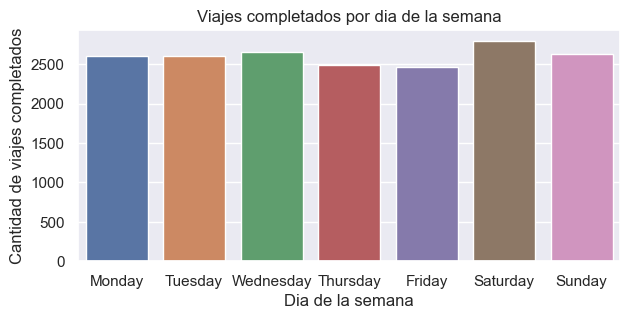

In [201]:
# grafico de viajes completados por dia de la semana
# graph of trips completed per day of the week

sns.set(rc={'figure.figsize':(7,3)})

sns.countplot(x='day_of_week', data=df_trips_day_completed, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.title('Viajes completados por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de viajes completados')
plt.show()



## 2) Which hour of the day generates the most revenue? 
#### 2) ¿Qué hora del día genera más ingresos?

<AxesSubplot: xlabel='trip_rev'>

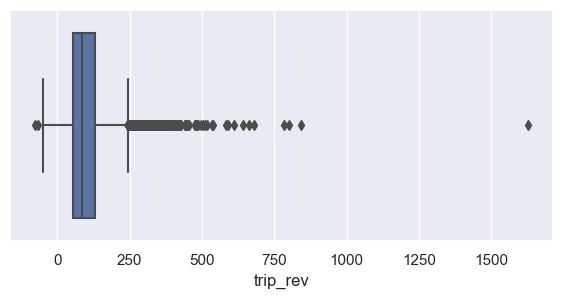

In [202]:
# Buscamos outliers en la columna revenue
# We look for outliers in the revenue column

sns.boxplot(x=df_trips_day['trip_rev'])


In [203]:
# Porcentaje de outliers en la columna revenue
# Percentage of outliers in the revenue column

df_trips_day[df_trips_day['trip_rev'] > 750]['trip_rev'].count()/df_trips_day['trip_rev'].count()*100



0.02117634602149399

El porcentaje de outliers es muy bajo, por lo que no se considera necesario eliminarlos.

The percentage of outliers is very low, so it is not considered necessary to eliminate them.

In [204]:
# No parece significativos los outliers, por lo que los dejamos. 
# The outliers do not seem significant, so we leave them.

# Cantidad de ganancias por hora del dia con indice por hora
# Amount of earnings per hour of the day with index per hour

reve_by_hour = df_trips_day.groupby('hour')['trip_rev'].sum().sort_values(ascending=False)
reve_by_hour



hour
17    93066.20
21    88358.05
20    86388.81
23    85504.48
18    84438.21
22    83886.19
5     82330.40
15    82003.86
16    81920.10
14    81627.18
13    81443.23
19    80748.67
11    79882.07
3     76598.14
12    76512.34
6     74250.66
9     73520.06
7     72410.69
4     71772.02
10    67921.53
8     67392.22
0     64020.58
2     63512.41
1     62229.94
Name: trip_rev, dtype: float64

In [205]:
# sacamos la media de ganancias por hora del dia y ordenamos por hora del dia
# we take the average earnings per hour of the day and sort by hour of the day

reve_by_hour_mean = reve_by_hour/365
reve_by_hour_mean

hour
17    254.975890
21    242.076849
20    236.681671
23    234.258849
18    231.337562
22    229.825178
5     225.562740
15    224.668110
16    224.438630
14    223.636110
13    223.132137
19    221.229233
11    218.854986
3     209.857918
12    209.622849
6     203.426466
9     201.424822
7     198.385452
4     196.635671
10    186.086384
8     184.636219
0     175.398849
2     174.006603
1     170.492986
Name: trip_rev, dtype: float64

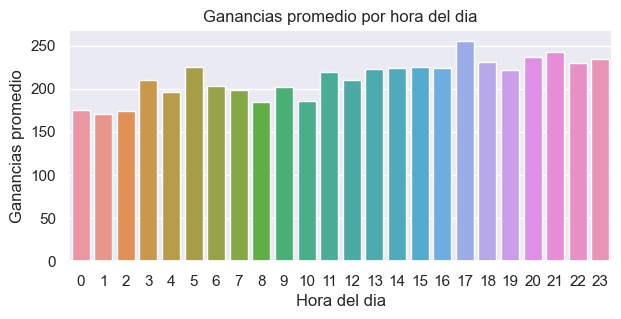

In [206]:
# grafico de ganancias promedio por hora del dia
# graph of average earnings per hour of the day

sns.set(rc={'figure.figsize':(7,3)})
sns.barplot(x=reve_by_hour_mean.index, y=reve_by_hour_mean.values)


plt.title('Ganancias promedio por hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Ganancias promedio')

plt.show()


La hora del dia que genera mas ganancia es las 17hs, seguido por las 20hs y 21hs. 

#### Hacemos un grafico de lineas y barras mostrando viajes por hora completados y revenue por hora de los viajes completados.
#### We make a line and bar chart showing trips per hour completed and revenue per hour of completed trips.

In [207]:
df_trips_day_completed_hour = df_trips[['hour','trip_rev','trip_status']]

df_trips_day_completed_hour.isnull().sum()

df_trips_day_completed_hour = df_trips_day_completed_hour[df_trips_day_completed_hour['trip_status'] == 'completed']

df_trips_day_completed_hour.isnull().sum()

hour           0
trip_rev       0
trip_status    0
dtype: int64

In [208]:

# creamos el dataset con las columnas que nos interesan, en este caso "hour", "trip_rev" y "trip_status".
# we create the dataset with the columns that interest us, in this case "hour", "trip_rev" and "trip_status".

df_trips_day_completed_hour = df_trips[['hour','trip_rev','trip_status']]

# agrupamos por hora y sumamos las ganancias y status
# we group by hour and add earnings and status

df_trips_day_completed_hour = df_trips_day_completed_hour.groupby('hour').agg({'trip_rev':'sum','trip_status':'count'})

# creamos una nueva columna con el promedio de ganancias por hora del dia
# we create a new column with the average earnings per hour of the day

df_trips_day_completed_hour['trip_rev_mean'] = df_trips_day_completed_hour['trip_rev']/365

# creamos una nueva columna con el de viajes con ganancia por hora del dia
# we create a new column with the number of trips with earnings per hour of the day

df_trips_day_completed_hour['trip_status_mean'] = df_trips_day_completed_hour['trip_status']/365

df_trips_day_completed_hour

,trip_rev,trip_status,trip_rev_mean,trip_status_mean
hour,,,,
0,64020.58,843,175.398849,2.309589
1,62229.94,808,170.492986,2.213699
2,63512.41,795,174.006603,2.178082
3,76598.14,884,209.857918,2.421918
4,71772.02,758,196.635671,2.076712
5,82330.40,865,225.562740,2.369863
6,74250.66,750,203.426466,2.054795
7,72410.69,845,198.385452,2.315068
8,67392.22,780,184.636219,2.136986


### Graficamos

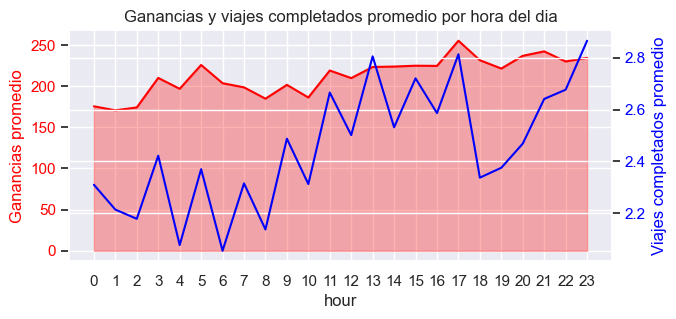

In [209]:
# Generamos un grafico de doble eje para comparar ganancias y viajes completados por hora del dia
# We generate a double axis graph to compare earnings and trips completed per hour of the day

# Ganancias promedio por hora del dia
# Average earnings per hour of the day

grafico = sns.lineplot(data=df_trips_day_completed_hour, x=df_trips_day_completed_hour.index, y='trip_rev_mean', color='red')
grafico.set_ylabel('Ganancias promedio', color='red')
grafico.tick_params(axis='y', labelcolor='red')

grafico.fill_between(df_trips_day_completed_hour.index, df_trips_day_completed_hour['trip_rev_mean'], alpha=0.3, color='red')


# Viajes completados promedio por hora del dia
# Average trips completed per hour of the day

grafico2 = grafico.twinx()
sns.lineplot(data=df_trips_day_completed_hour, x=df_trips_day_completed_hour.index, y='trip_status_mean', color='blue', ax=grafico2)
grafico2.set_ylabel('Viajes completados promedio', color='blue')
grafico2.tick_params(axis='y', labelcolor='blue')

grafico.set_xticks(df_trips_day_completed_hour.index)


plt.title('Ganancias y viajes completados promedio por hora del dia')

plt.show()

## 3) For the driver ID: 673 determine the mean time between trips (from one trip’s drop_datetime, to the next trip’s request_datetime).
#### 3) Para el ID del conductor: 673 determine el tiempo medio entre viajes (desde el drop_datetime de un viaje, hasta el request_datetime del siguiente viaje).

Para obtener con precision el tiempo entre viajes debemos identificar los viajes realizados cada dia o cada turno del conductor para no obtener datos erroneos como tiempos entre viajes de mas de 24 horas. Otro factor a tener en cuenta es que el conductor puede tener una request de viaje durante la realizacion de otro viaje por lo que en ese caso no hay tiempo de espera. 

To accurately obtain the time between trips, we must identify the trips made each day or each shift of the driver so as not to obtain erroneous data such as times between trips of more than 24 hours. Another factor to consider is that the driver may have a trip request while making another trip, so in that case there is no waiting time.

In [210]:
# Creamos un dataframe con los datos del conductor 673 para poder analizarlos
# We create a dataframe with the data of driver 673 in order to analyze them

driver_673 = df_trips[df_trips['id_driver'] == 673]

driver_673 = driver_673[['id_driver','request_datetime','drop_datetime', 'id_shift']]


# pasamos las columnas dropoff_datetime y request_datetime a formato datetime
# we pass the dropoff_datetime and request_datetime columns to datetime format

driver_673['drop_datetime'] = pd.to_datetime(driver_673['drop_datetime'])
driver_673['request_datetime'] = pd.to_datetime(driver_673['request_datetime'])

# Ordenamos el dataframe por fecha de request_datetime
# We sort the dataframe by request_datetime date

driver_673 = driver_673.sort_values(by='request_datetime')

# reset index


driver_673 = driver_673.reset_index(drop=True)


# creamos una columna con la diferencia de tiempo entre el viaje anterior y el actual solo si el viaje es del mismo dia
# we create a column with the time difference between the previous trip and the current one only if the trip is on the same day

driver_673['diff_time'] = driver_673['request_datetime'].shift(-1) -driver_673['drop_datetime']

for i in range(len(driver_673['diff_time'])):
    
    if i != len(driver_673['diff_time'])-1:
        if (driver_673['id_shift'][i] == driver_673['id_shift'][i+1]):
           if (driver_673['diff_time'][i].days == -1):
                driver_673['diff_time'][i] = pd.NaT
        else:
            driver_673['diff_time'][i] = pd.NaT
    else:
        driver_673['diff_time'][i] = pd.NaT  


driver_673.head(20)




,id_driver,request_datetime,drop_datetime,id_shift,diff_time
0,673,2022-08-22 05:10:00,2022-08-22 05:31:00,30477.0,NaT
1,673,2022-08-22 05:25:00,2022-08-22 05:55:00,30477.0,0 days 00:05:00
2,673,2022-08-22 06:00:00,2022-08-22 06:22:00,30477.0,0 days 00:08:00
3,673,2022-08-22 06:30:00,2022-08-22 06:58:00,30477.0,0 days 00:09:00
4,673,2022-08-22 07:07:00,2022-08-22 07:56:00,30477.0,NaT
5,673,2022-08-22 07:52:00,2022-08-22 08:32:00,30477.0,NaT
6,673,2022-08-22 08:29:00,2022-08-22 08:59:00,30477.0,NaT
7,673,2022-08-22 08:52:00,2022-08-22 09:35:00,30477.0,0 days 00:12:00
8,673,2022-08-22 09:47:00,2022-08-22 10:08:00,30477.0,0 days 00:07:00
9,673,2022-08-22 10:15:00,2022-08-22 10:37:00,30477.0,NaT


In [211]:
driver_673.describe()

,id_driver,id_shift,diff_time
count,75.0,65.000000,29
mean,673.0,30478.984615,0 days 00:09:12.413793103
std,0.0,1.484212,0 days 00:09:43.570629661
min,673.0,30477.000000,0 days 00:00:00
25%,673.0,30478.000000,0 days 00:01:00
50%,673.0,30479.000000,0 days 00:07:00
75%,673.0,30480.000000,0 days 00:14:00
max,673.0,30481.000000,0 days 00:37:00


In [212]:
# Total tiempo de espera entre viajes del conductor 673
# Total waiting time between trips of driver 673

print(f"El total de tiempo de espera entre viajes del conductor 673 es de: {driver_673['diff_time'].sum()}")
print(f"Total time of waiting between trips of driver 673 is: {driver_673['diff_time'].sum()}\n")


# promedio
# average

print(f"El promedio de espera entre viajes del conducto 673 es de: {driver_673['diff_time'].mean()}")
print(f"Average waiting between trips of driver 673 is: {driver_673['diff_time'].mean()}")

El total de tiempo de espera entre viajes del conductor 673 es de: 0 days 04:27:00
Total time of waiting between trips of driver 673 is: 0 days 04:27:00

El promedio de espera entre viajes del conducto 673 es de: 0 days 00:09:12.413793103
Average waiting between trips of driver 673 is: 0 days 00:09:12.413793103


## 4) If you had to fire one driver, who would it be? Indicate the Id_driver and the reasons that support your decision.
#### 4) Si tuvieras que despedir a un conductor, ¿quién sería? Indique el Id_driver y las razones que respaldan su decisión.

Analizo las variables que influyen en el rendimiento de los conductores, como cantidad de viajes, revenue, tiempo entre viajes, etc.

I analyze the variables that influence the performance of the drivers, such as number of trips, revenue, time between trips, etc.

In [213]:
# Creamos un dataframe de conductores sumando revenue, tiempo de espera entre viajes, cantidad de viajes completados y cantidad de viajes cancelados por conductor
# We create a dataframe of drivers adding revenue, waiting time between trips, number of completed trips and number of canceled trips per driver

df_trips['drop_datetime'] = pd.to_datetime(df_trips['drop_datetime'])
df_trips['request_datetime'] = pd.to_datetime(df_trips['request_datetime'])

df_trips['driver_canceled'] = df_trips['trip_status'].apply(lambda x: 1 if x == 'driver_cancelled' else 0)
df_trips['completed'] = df_trips['trip_status'].apply(lambda x: 1 if x == 'completed' else 0)
df_trips['delivery_failed'] = df_trips['trip_status'].apply(lambda x: 1 if x == 'delivery_failed' else 0)
df_trips['failed'] = df_trips['trip_status'].apply(lambda x: 1 if x == 'failed' else 0)

df_drivers = df_trips.groupby('id_driver').agg({'trip_rev':'sum','completed':'sum','driver_canceled':'sum','delivery_failed':'sum', 'failed':'sum','trips_per_hour':'mean'})
df_drivers['trip_rev_mean'] = df_drivers['trip_rev']/df_drivers['completed']
df_drivers



,trip_rev,completed,driver_canceled,delivery_failed,failed,trips_per_hour,trip_rev_mean
id_driver,,,,,,,
6,6210.09,56,1,0,0,1.903095,110.894464
12,4902.45,48,2,0,0,1.663235,102.134375
22,4929.61,54,1,0,0,1.905580,91.289074
26,5754.06,76,3,0,0,2.297025,75.711316
31,6098.73,55,3,1,0,1.702420,110.886000
...,...,...,...,...,...,...,...
976,4858.91,42,0,0,0,1.632537,115.688333
977,4159.95,39,0,0,0,1.771220,106.665385
978,2648.22,25,0,0,0,1.711082,105.928800


In [214]:
# sacamos el promedio de espera entre viajes para cada conductor.
# we take the average waiting time between trips for each driver.

df_drivers_time_between_trips = pd.DataFrame(columns=['id_driver','diff'])

for id_driver in df_trips['id_driver'].unique():
    driver = df_trips[df_trips['id_driver'] == id_driver]
    driver = driver.sort_values(by='request_datetime')
    driver['diff'] = driver['request_datetime'].shift(-1) - driver['drop_datetime']
    for i in range(len(driver['diff'])):
        if i != len(driver['diff'])-1:
            if (driver['id_shift'].iloc[i] == driver['id_shift'].iloc[i+1]):
                if (driver['diff'].iloc[i].days == -1):
                    driver['diff'].iloc[i] = pd.NaT
            else:
                driver['diff'].iloc[i] = pd.NaT
        else:
            driver['diff'].iloc[i] = pd.NaT
    df_drivers.loc[id_driver,'diff'] = driver['diff'].mean()
    df_drivers_time_between_trips.loc[id_driver,'id_driver'] = id_driver
    df_drivers_time_between_trips.loc[id_driver,'diff'] = driver['diff'].mean()


df_drivers_time_between_trips = df_drivers_time_between_trips.sort_values(by='diff')
df_drivers_time_between_trips




,id_driver,diff
924,924,0 days 00:01:35
703,703,0 days 00:02:00
949,949,0 days 00:02:10
506,506,0 days 00:03:00
336,336,0 days 00:03:12
...,...,...
61,61,0 days 00:48:33.750000
785,785,0 days 00:50:00
789,789,0 days 01:02:30
970,970,0 days 01:08:00


In [215]:
# Unimos los dataframes df_drivers y df_drivers_time_between_trips para tener toda la informacion de los conductores en un solo dataframe, agregando el promedio de espera entre viajes
# We join the df_drivers and df_drivers_time_between_trips dataframes to have all the information of the drivers in a single dataframe, adding the average waiting between trips

df_drivers = df_drivers.merge(df_drivers_time_between_trips, on='id_driver')
df_drivers.drop(columns='diff_x', inplace=True)
df_drivers.rename(columns={'diff_y':'time_between_trips'}, inplace=True)
df_drivers.reset_index(inplace=True)

df_drivers

,index,id_driver,trip_rev,completed,driver_canceled,delivery_failed,failed,trips_per_hour,trip_rev_mean,time_between_trips
0,0,6,6210.09,56,1,0,0,1.903095,110.894464,0 days 00:07:23.478260869
1,1,12,4902.45,48,2,0,0,1.663235,102.134375,0 days 00:21:12
2,2,22,4929.61,54,1,0,0,1.905580,91.289074,0 days 00:13:56.842105263
3,3,26,5754.06,76,3,0,0,2.297025,75.711316,0 days 00:15:00
4,4,31,6098.73,55,3,1,0,1.702420,110.886000,0 days 00:13:49.411764705
...,...,...,...,...,...,...,...,...,...,...
359,359,976,4858.91,42,0,0,0,1.632537,115.688333,0 days 00:15:41.052631578
360,360,977,4159.95,39,0,0,0,1.771220,106.665385,0 days 00:08:00
361,361,978,2648.22,25,0,0,0,1.711082,105.928800,0 days 00:07:20
362,362,979,2413.40,21,1,1,0,1.553492,114.923810,0 days 00:13:36


In [216]:
# Sacamos el ratio de exito de viajes
# We take the success ratio of trips

df_drivers['success_ratio'] = df_drivers['completed']/(df_drivers['completed'] + df_drivers['driver_canceled'])

# ordenamos por menor ratio de exito
# we sort by lower success ratio

df_drivers = df_drivers.sort_values(by='success_ratio')

df_drivers.head(10)


# df_drivers[df_drivers['id_driver'] == 789]

,index,id_driver,trip_rev,completed,driver_canceled,delivery_failed,failed,trips_per_hour,trip_rev_mean,time_between_trips,success_ratio
206,206,789,2827.71,30,4,3,0,1.247760,94.257000,0 days 01:02:30,0.882353
358,358,975,1048.31,8,1,0,0,1.295591,131.038750,0 days 00:19:00,0.888889
95,95,559,4797.98,43,5,1,0,1.413070,111.580930,0 days 00:12:42.352941176,0.895833
205,205,785,2103.50,18,2,1,0,1.533157,116.861111,0 days 00:50:00,0.900000
338,338,954,890.99,9,1,0,0,1.298303,98.998889,0 days 00:11:42.857142857,0.900000
21,21,173,4950.21,50,5,0,0,1.519878,99.004200,0 days 00:06:00,0.909091
175,175,728,4244.50,31,3,0,0,1.331938,136.919355,0 days 00:12:42.857142857,0.911765
127,127,633,4594.39,44,4,0,0,1.493495,104.417955,0 days 00:34:16.363636363,0.916667
341,341,957,2680.32,23,2,0,0,1.511845,116.535652,0 days 00:10:20,0.920000
103,103,573,4866.36,61,5,0,0,1.772284,79.776393,0 days 00:06:26.086956521,0.924242


### Graficamos para poder observar mejor los peores 10 desempeños
### We graph to better observe the worst 10 performances

Text(0.5, 1.0, 'Viajes completados y cancelados por conductor y ratio de exito')

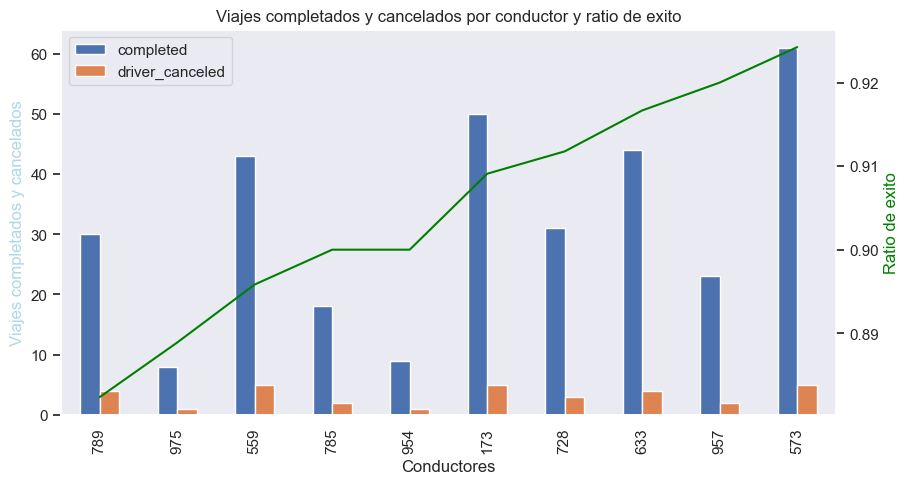

In [217]:
# generamos un grafico de doble eje con el ratio de exito y los viajes completados y cancelados de los 10 peores conductores
# we generate a double axis graph with the success ratio and the completed and canceled trips of the 10 worst drivers

df_drivers_worst = df_drivers.head(10)
df_drivers_worst['id_driver'] = df_drivers_worst['id_driver'].astype(str)


# grafico de barras de cancelados y completados
# bar graph of canceled and completed

grafico_1 = df_drivers_worst.plot(x='id_driver', y=['completed','driver_canceled'], kind='bar', figsize=(10,5), title='10 peores conductores con viajes completados y cancelados')


# grafico de linea de ratio de exito
# success ratio line graph

grafico_3 = grafico_1.twinx()
sns.lineplot(x=df_drivers_worst['id_driver'], y=df_drivers_worst['success_ratio'], color='green', ax=grafico_3)



grafico_1.grid(False)
grafico_3.grid(False)


grafico_3.set_ylabel('Ratio de exito', color='green')

grafico_1.set_xlabel('Conductores')

grafico_1.set_ylabel('Viajes completados y cancelados', color='lightblue')

grafico_1.set_title('Viajes completados y cancelados por conductor y ratio de exito')

# agrego valores de ratio a los puntos del grafico



- Si tengo que despedir a un conductor optaria por el ID 789, no es el que menos viajes realiza o que menos revenue tiene pero es el que tiene un menor ratio de viajes completados y un mayor tiempo entre viajes. Estos factores nos indican que el conductor desgasta una unidad inecesarimente durante el tiempo de espera entre viajes por lo que no es eficiente. 

- If i have to fire a driver i would choose the ID 789, it is not the one that makes the least trips or that has the least revenue but it is the one that has the lowest ratio of completed trips and the longest time between trips. These factors indicate that the driver unnecessarily wears out a unit during the waiting time between trips so it is not efficient.

## Do you find any correlation between the parameters in the dataset that have caught your eye?
#### ¿Encuentra alguna correlación entre los parámetros en el conjunto de datos que hayan llamado su atención?

Los conductores con mas viajes por hora son los que mas revenue generan menos viajes cancelan y generalmente menos viajes fallidos tienen. Esto les permite tener un mayor ratio de viajes completados y un menor tiempo entre viajes. Esto hace que estos conductores sean mas eficientes en la utilizacion de sus unidades. 

In [218]:
df_drivers = df_drivers.sort_values(by='trips_per_hour', ascending=False)
df_drivers.head(10)

,index,id_driver,trip_rev,completed,driver_canceled,delivery_failed,failed,trips_per_hour,trip_rev_mean,time_between_trips,success_ratio
88,88,520,8850.49,107,4,0,0,3.101969,82.714860,0 days 00:09:37.090909090,0.963964
65,65,426,8170.42,101,1,0,0,2.983191,80.895248,0 days 00:06:58.983050847,0.990196
51,51,370,6766.16,62,0,1,0,2.723889,109.131613,0 days 00:09:39.130434782,1.000000
15,15,134,5750.69,78,0,1,0,2.713639,73.726795,0 days 00:13:01.200000,1.000000
231,231,825,912.23,13,1,0,0,2.536353,70.171538,0 days 00:10:40,0.928571
8,8,51,4338.89,51,0,0,0,2.532681,85.076275,0 days 00:06:40,1.000000
98,98,566,5970.85,87,2,1,0,2.480783,68.630460,0 days 00:07:48.813559322,0.977528
235,235,830,4066.57,65,0,0,0,2.444518,62.562615,0 days 00:12:06.382978723,1.000000
167,167,715,5624.47,73,1,0,0,2.417607,77.047534,0 days 00:10:30,0.986486
273,273,878,1311.52,17,0,0,0,2.399298,77.148235,0 days 00:09:24,1.000000


In [219]:
df_drivers = df_drivers.sort_values(by='trip_rev', ascending=False)
df_drivers.head(10)

,index,id_driver,trip_rev,completed,driver_canceled,delivery_failed,failed,trips_per_hour,trip_rev_mean,time_between_trips,success_ratio
88,88,520,8850.49,107,4,0,0,3.101969,82.714860,0 days 00:09:37.090909090,0.963964
65,65,426,8170.42,101,1,0,0,2.983191,80.895248,0 days 00:06:58.983050847,0.990196
321,321,935,8003.72,61,0,0,0,1.857581,131.208525,0 days 00:13:32.727272727,1.000000
184,184,752,7857.63,58,0,1,0,1.615101,135.476379,0 days 00:19:06.666666666,1.000000
293,293,903,7799.88,51,3,1,0,1.427311,152.938824,0 days 00:13:54.285714285,0.944444
292,292,902,7787.79,69,0,1,0,2.105389,112.866522,0 days 00:12:10.909090909,1.000000
256,256,856,7729.13,70,0,0,0,1.971291,110.416143,0 days 00:07:15,1.000000
156,156,695,7652.69,60,0,0,0,1.492075,127.544833,0 days 00:21:30,1.000000
165,165,713,7619.78,62,0,0,0,1.854777,122.899677,0 days 00:13:54.193548387,1.000000
195,195,770,7548.49,58,1,0,0,1.584928,130.146379,0 days 00:08:18.461538461,0.983051


In [220]:
df_drivers = df_drivers.sort_values(by='time_between_trips', ascending=False)
df_drivers.head(10)

,index,id_driver,trip_rev,completed,driver_canceled,delivery_failed,failed,trips_per_hour,trip_rev_mean,time_between_trips,success_ratio
353,353,970,1689.78,16,0,1,0,1.682942,105.611250,0 days 01:08:00,1.000000
206,206,789,2827.71,30,4,3,0,1.247760,94.257000,0 days 01:02:30,0.882353
205,205,785,2103.50,18,2,1,0,1.533157,116.861111,0 days 00:50:00,0.900000
9,9,61,4073.71,33,1,0,0,1.529569,123.445758,0 days 00:48:33.750000,0.970588
275,275,880,2502.37,26,0,1,0,1.900804,96.245000,0 days 00:45:50,1.000000
142,142,672,2616.46,25,0,0,0,1.488321,104.658400,0 days 00:42:13.333333333,1.000000
170,170,721,3405.88,25,1,0,0,1.601762,136.235200,0 days 00:42:00,0.961538
185,185,754,2290.19,20,0,0,0,1.457666,114.509500,0 days 00:41:25.714285714,1.000000
112,112,598,4204.26,44,3,2,0,1.539483,95.551364,0 days 00:40:13.846153846,0.936170
106,106,578,4911.90,47,1,0,0,1.585057,104.508511,0 days 00:40:00,0.979167
